In [2]:
from chase.base import *
from chase.utils import *
from chase.fit import *

#FIGDEST = '/Users/markant/Dropbox/sharelatex/ssDFE/ssDFEpsychrev_v0/figures/'

In [4]:
arr = np.genfromtxt('data/six_problems.csv', delimiter=',')
problems = {i: arr[i].reshape((2,2,2)) for i in range(len(arr))}

In [5]:
problems

{0: array([[[ 3. ,  1. ],
         [ 0. ,  0. ]],
 
        [[ 4. ,  0.8],
         [ 0. ,  0.2]]]), 1: array([[[ 3.  ,  0.25],
         [ 0.  ,  0.75]],
 
        [[ 4.  ,  0.2 ],
         [ 0.  ,  0.8 ]]]), 2: array([[[-32. ,   0.1],
         [  0. ,   0.9]],
 
        [[ -3. ,   1. ],
         [  0. ,   0. ]]]), 3: array([[[-4. ,  0.8],
         [ 0. ,  0.2]],
 
        [[-3. ,  1. ],
         [ 0. ,  0. ]]]), 4: array([[[  3. ,   1. ],
         [  0. ,   0. ]],
 
        [[ 32. ,   0.1],
         [  0. ,   0.9]]]), 5: array([[[  3.00000000e+00,   2.50000000e-01],
         [  0.00000000e+00,   7.50000000e-01]],
 
        [[  3.20000000e+01,   2.50000000e-02],
         [  0.00000000e+00,   9.75000000e-01]]])}

# Sim 1: Recovery of linear weighting (six problems)

### Generate datasets

In [25]:
N_GEN = 1000
pstay_set = [.3]
theta_set = [2, 6]
tau_set = [.001, 1.]
cols = ['subject', 'problem', 'group', 'choice', 'samplesize']
OUTDIR = 'chase_recovery_sim1'

In [26]:
genpar = []
for theta in theta_set:
    for pstay in pstay_set:
        for tau in tau_set:
            genpar.append({'theta': theta,
                           'p_stay': pstay,
                           'tau': tau,
                           'N': N_GEN})
print '# datasets:', len(genpar)

# datasets: 4


In [27]:
for j, pars in enumerate(genpar):
    pth = '%s/dataset%s.csv' % (OUTDIR, j)
    
    m = CHASEModel(drift='ev',
                   startdist='softmax')

    arr = []
    for pid in range(6):
        traj = m.sample_trajectories(problems[pid], pars)
        
        for i, tr in enumerate(traj):
            arr.append([i, pid, 0, tr['choice'], tr['samplesize']])
            
    df = pd.DataFrame(arr, columns=cols)
    df.to_csv(pth)

chase_recovery_sim1/dataset0.csv
chase_recovery_sim1/dataset1.csv
chase_recovery_sim1/dataset2.csv
chase_recovery_sim1/dataset3.csv


### Fit with CHASE for different Ns

In [253]:
N_SET = [20, 100]
N_ITER = 100
N_FIT_ITER = 3
FIXED = {'delta': 0.5}

fitting = {'theta': [1, 9],
           'p_stay': [0, 1],
           'tau': [0, np.inf, 1.],
           'prelec_gamma': [0, 5]}


for j, pars in enumerate(genpar):
    
    if j >= 3:
    
        # load dataset
        data = pd.read_csv('%s/dataset%s.csv' % (OUTDIR, j))

        for N in N_SET:
            print j, N
            for iteration in range(N_ITER):

                SIM_ID = 'recovery_dataset%s_N=%s_iter=%s' % (j, N, iteration)

                # sample a dataset of size N per problem
                ds = data.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)

                # initialize the model
                m = CHASEModel(drift='cpt',
                               startdist='softmax')

                # fit
                results = fit_mlh(m, problems, ds, 
                                  SIM_ID, FIXED, fitting, niter=N_FIT_ITER, outdir=OUTDIR)

3 20
recovery_dataset3_N=20_iter=0(p_stay,prelec_gamma,tau,theta|delta=0.5)


KeyboardInterrupt: 

In [229]:
arr = []
for j in range(3):
    
    for N in N_SET:
        for iteration in range(N_ITER):
            pth = 'recovery_dataset%s_N=%s_iter=%s' % (j, N, iteration)
            best = best_result(pth, FIXED, fitting, OUTDIR)
            arr.append([j, N, iteration, best['theta'], best['p_stay'], best['tau'], best['prelec_gamma']])
fitdf = pd.DataFrame(arr, columns=['dataset', 'N', 'iteration', 'bf_theta', 'bf_p_stay', 'bf_tau', 'bf_gamma'])

recovery_dataset0_N=20_iter=0
recovery_dataset0_N=20_iter=1
recovery_dataset0_N=20_iter=2
recovery_dataset0_N=20_iter=3
recovery_dataset0_N=20_iter=4
recovery_dataset0_N=20_iter=5
recovery_dataset0_N=20_iter=6
recovery_dataset0_N=20_iter=7
recovery_dataset0_N=20_iter=8
recovery_dataset0_N=20_iter=9
recovery_dataset0_N=20_iter=10
recovery_dataset0_N=20_iter=11
recovery_dataset0_N=20_iter=12
recovery_dataset0_N=20_iter=13
recovery_dataset0_N=20_iter=14
recovery_dataset0_N=20_iter=15
recovery_dataset0_N=20_iter=16
recovery_dataset0_N=20_iter=17
recovery_dataset0_N=20_iter=18
recovery_dataset0_N=20_iter=19
recovery_dataset0_N=20_iter=20
recovery_dataset0_N=20_iter=21
recovery_dataset0_N=20_iter=22
recovery_dataset0_N=20_iter=23
recovery_dataset0_N=20_iter=24
recovery_dataset0_N=20_iter=25
recovery_dataset0_N=20_iter=26
recovery_dataset0_N=20_iter=27
recovery_dataset0_N=20_iter=28
recovery_dataset0_N=20_iter=29
recovery_dataset0_N=20_iter=30
recovery_dataset0_N=20_iter=31
recovery_dataset0_

In [230]:
fitdf.groupby(['dataset', 'N'])['bf_tau'].describe()

dataset  N         
0        20   count    1.000000e+02
              mean     1.572400e+00
              std      1.263720e+01
              min      2.503322e-09
              25%      1.120837e-07
              50%      5.244163e-04
              75%      5.519270e-01
              max      1.265794e+02
         100  count    1.000000e+02
              mean     2.170815e+00
              std      2.116971e+01
              min      3.803268e-10
              25%      1.415622e-07
              50%      8.467320e-07
              75%      7.465616e-02
              max      2.117457e+02
1        20   count    1.000000e+02
              mean     1.042669e+00
              std      3.923842e-01
              min      2.105133e-07
              25%      7.931098e-01
              50%      1.037189e+00
              75%      1.312916e+00
              max      1.952064e+00
         100  count    1.000000e+02
              mean     1.043183e+00
              std      1.837827e-01
        

In [245]:
fit_ds = fitdf[(fitdf.dataset==0) & (fitdf.N==N)]

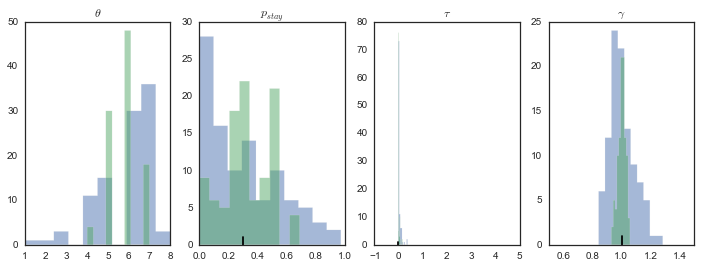

In [252]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

for i in [2]:

    p_stay = genpar[i]['p_stay']
    tau = genpar[i]['tau']
    gamma = 1.
    
    ax[1].plot([p_stay, p_stay], [0, 1], '-', color='black')
    ax[2].plot([tau, tau], [0, 1], '-', color='black')
    ax[3].plot([gamma, gamma], [0, 1], '-', color='black')

    for N in N_SET:
        fit_ds = fitdf[(fitdf.dataset==i) & (fitdf.N==N)]
        ax[0].hist(fit_ds['bf_theta'].values, histtype='stepfilled', alpha=.5)
        ax[0].set_title(r'$\theta$')
        ax[1].hist(fit_ds['bf_p_stay'].values, histtype='stepfilled', alpha=.5)
        ax[1].set_title(r'$p_{stay}$')
        ax[2].hist(fit_ds['bf_tau'].values, histtype='stepfilled', alpha=.5)
        ax[2].set_title(r'$\tau$') 
        ax[3].hist(fit_ds['bf_gamma'].values, histtype='stepfilled', alpha=.5)
        ax[3].set_title(r'$\gamma$')

    ax[1].set_xlim(0, 1)
    ax[2].set_xlim(-1, 5)
    ax[3].set_xlim(0.5, 1.5)

plt.show()

### Fit with CPT

In [155]:
from scipy.optimize import minimize
from copy import deepcopy
import cogmod.cpt as cpt
from collections import OrderedDict

In [164]:
def MSD(value, args):
    pars, fitting, verbose = unpack(value, args)
    if outside_bounds(value, fitting): return np.inf

    problems = pars['data']['problems']
    predicted = np.array(pars['data']['cp'])
    
    cpt_p_resp = []
    for i, prob in enumerate(problems):
        cpt_p_resp.append(cpt.choice_prob(prob, pars))
    
    msd = np.mean((predicted - np.array(cpt_p_resp)) ** 2)
    return msd

In [225]:
cptdf = pd.DataFrame(columns=['dataset', 'N', 'iteration', 'bf_s', 'bf_gamma'])

In [278]:
N_SET = [20, 100]
N_ITER = 100

fitting = {'s': [0, 10, 1.], 
           'prelec_gamma': [0, 5, 1.]}
init = [1., 1.]

for j in [2]:
    data = pd.read_csv('%s/dataset%s.csv' % (OUTDIR, j))

    for N in N_SET:
        print j, N
        for iteration in range(N_ITER):
                
            # sample a dataset of size N per problem
            ds = data.groupby('problem').apply(lambda d: d.iloc[np.random.randint(d.shape[0], size=N)]).reset_index(0, drop=True)
            
            pars = {'data': {'problems': [problems[i] for i in range(6)],
                             'cp': ds.groupby('problem').apply(lambda d: np.mean(d.choice)).values},
                    'fitting': OrderedDict([(p, fitting[p]) for p in fitting])}

            f = minimize(MSD, init, (pars,), method='Nelder-Mead')

            cptdf.loc[cptdf.shape[0]] = [j, N, iteration, f['x'][0], f['x'][1]]

2 20
2 100


In [277]:
cptdf.groupby(['dataset', 'N']).describe()

bf_gamma          bf_s   iteration
dataset N                                              
0       20  count  100.000000  1.000000e+02  100.000000
            mean     1.262905  1.183877e+00   49.500000
            std      1.138859  1.166542e+00   29.011492
            min      0.000002  1.951887e-13    0.000000
            25%      0.983658  9.954559e-02   24.750000
            50%      1.020741  9.017486e-01   49.500000
            75%      1.061901  1.947657e+00   74.250000
            max      4.999991  4.587025e+00   99.000000
        100 count  100.000000  1.000000e+02  100.000000
            mean     1.119944  1.079797e+00   49.500000
            std      0.708835  5.801939e-01   29.011492
            min      0.000014  3.799557e-05    0.000000
            25%      1.017748  6.800071e-01   24.750000
            50%      1.031370  1.126886e+00   49.500000
            75%      1.044848  1.465330e+00   74.250000
            max      4.999912  2.419868e+00   99.000000
1       20  count  100.000000  1.000000e+02  100.000000
            mean     1.214828  1.213759e+00   49.500000
            std      0.963293  1.093072e+00   29.011492
            min      0.000004  6.141298e-11    0.000000
            25%      0.994090  2.476077e-01   24.750000
            50%      1.030957  1.105251e+00   49.500000
            75%      1.059955  1.811552e+00   74.250000
            max      5.000000  4.924547e+00   99.000000
        100 count  100.000000  1.000000e+02  100.000000
            mean     1.101692  9.592680e-01   49.500000
            std      0.577357  5.929342e-01   29.011492
            min      0.000247  1.182031e-05    0.000000
            25%      1.006860  4.657789e-01   24.750000
            50%      1.023091  8.895056e-01   49.500000
            75%      1.037080  1.476297e+00   74.250000
            max      4.999988  2.373946e+00   99.000000

In [276]:
np.sum((cptdf[(cptdf.dataset==2) & (cptdf.N==100)].bf_gamma > 1).values)

0

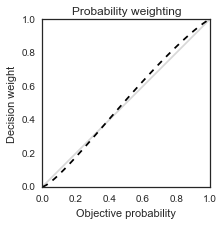

In [196]:
def prelec(p, prelec_elevation, prelec_gamma):
    return np.exp(-prelec_elevation * ((-np.log(p)) ** prelec_gamma))

p = np.arange(0, 1, .01)
fig, axi = plt.subplots(figsize=(3,3))
axi.plot([0, 1], [0, 1], color='gray', alpha=.3)
axi.plot(p, prelec(p, 1., 1.15), '--', color='black')
axi.set_title('Probability weighting')
axi.set_xlabel('Objective probability')
axi.set_ylabel('Decision weight')
plt.show()

# Sim 2: Recovery of non-linear weighting (six problems)